# Attribute Inference Attack (AIA) Dataset F

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = "EVALUATION FUNCTIONS/PRIVACY"
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for membership attack simulation
from attribute_inference import DataPreProcessor
from attribute_inference import RiskAttributesPredictors
from attribute_inference import identified_attributes_percentage

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/F_IndianLiverPatient_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/F_IndianLiverPatient_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/F_IndianLiverPatient_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/F_IndianLiverPatient_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/F_IndianLiverPatient_Synthetic_WGANGP.csv'}
categorical_columns = ['gender','class']
numerical_columns = ['age','TB','DB','alkphos','sgpt','sgot','TP','ALB','A_G']
qid_columns = ['age','gender']
risk_attributes = ['TB','DB','alkphos','sgpt','sgot','TP','ALB','A_G','class']

data = dict()
data_qid = dict()
data_risk = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    #data[name] = data[name].drop(['id'],axis=1)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category').cat.codes
    data_qid[name] = data[name][qid_columns]
    data_risk[name] = data[name][risk_attributes]
data

{'Real':      age  gender   TB   DB  alkphos  sgpt   sgot   TP  ALB   A_G  class
 0     68       0  0.6  0.1   1620.0  95.0  127.0  4.6  2.1  0.80      0
 1     31       1  1.3  0.5    184.0  29.0   32.0  6.8  3.4  1.00      0
 2     28       1  0.8  0.3    190.0  20.0   14.0  4.1  2.4  1.40      0
 3     60       1  2.3  0.6    272.0  79.0   51.0  6.6  3.5  1.10      0
 4     48       0  0.9  0.2    173.0  26.0   27.0  6.2  3.1  1.00      0
 ..   ...     ...  ...  ...      ...   ...    ...  ...  ...   ...    ...
 461   75       0  0.8  0.2    188.0  20.0   29.0  4.4  1.8  0.60      0
 462   36       1  5.3  2.3    145.0  32.0   92.0  5.1  2.6  1.00      1
 463   37       1  0.7  0.2    235.0  96.0   54.0  9.5  4.9  1.00      0
 464   17       0  0.5  0.1    206.0  28.0   21.0  7.1  4.5  1.70      1
 465   17       1  0.9  0.2    224.0  36.0   45.0  6.9  4.2  1.55      0
 
 [466 rows x 11 columns],
 'GM':      age  gender        TB        DB     alkphos        sgpt        sgot  \
 0   

In [5]:
data_qid

{'Real':      age  gender
 0     68       0
 1     31       1
 2     28       1
 3     60       1
 4     48       0
 ..   ...     ...
 461   75       0
 462   36       1
 463   37       1
 464   17       0
 465   17       1
 
 [466 rows x 2 columns],
 'GM':      age  gender
 0     68       1
 1     62       0
 2     66       1
 3     18       1
 4     28       1
 ..   ...     ...
 461   44       1
 462   45       1
 463   23       1
 464   56       1
 465   41       1
 
 [466 rows x 2 columns],
 'SDV':      age  gender
 0     44       1
 1     46       1
 2      9       1
 3     46       1
 4     33       1
 ..   ...     ...
 461   62       1
 462    7       0
 463   52       1
 464   60       1
 465   52       1
 
 [466 rows x 2 columns],
 'CTGAN':      age  gender
 0     48       1
 1     63       1
 2     46       1
 3     32       1
 4     54       1
 ..   ...     ...
 461    4       0
 462   59       1
 463   68       0
 464   66       1
 465   45       1
 
 [466 rows x 2 columns]

In [6]:
data_risk

{'Real':       TB   DB  alkphos  sgpt   sgot   TP  ALB   A_G  class
 0    0.6  0.1   1620.0  95.0  127.0  4.6  2.1  0.80      0
 1    1.3  0.5    184.0  29.0   32.0  6.8  3.4  1.00      0
 2    0.8  0.3    190.0  20.0   14.0  4.1  2.4  1.40      0
 3    2.3  0.6    272.0  79.0   51.0  6.6  3.5  1.10      0
 4    0.9  0.2    173.0  26.0   27.0  6.2  3.1  1.00      0
 ..   ...  ...      ...   ...    ...  ...  ...   ...    ...
 461  0.8  0.2    188.0  20.0   29.0  4.4  1.8  0.60      0
 462  5.3  2.3    145.0  32.0   92.0  5.1  2.6  1.00      1
 463  0.7  0.2    235.0  96.0   54.0  9.5  4.9  1.00      0
 464  0.5  0.1    206.0  28.0   21.0  7.1  4.5  1.70      1
 465  0.9  0.2    224.0  36.0   45.0  6.9  4.2  1.55      0
 
 [466 rows x 9 columns],
 'GM':            TB        DB     alkphos        sgpt        sgot        TP  \
 0    0.792221  0.210326  403.231073   41.466674   33.224376  5.532269   
 1    1.081347  0.299965  432.280680   29.344795   45.448756  6.762787   
 2    1.106183  0

## 2. Train models to predict attributes values

In [7]:
#initialize classifiers
categorical_columns = None
numerical_columns = ['age']
categories = None
    
classifiers_all = dict()
data_preprocessors = dict()
attributes_models_all = dict()

for name in SYNTHESIZERS : 
    print(name)
    data_preprocessors[name] = DataPreProcessor(categorical_columns, numerical_columns, categories)
    x_train = data_preprocessors[name].preprocess_train_data(data_qid[name])
    
#     attributes_models = dict()
#     attributes_models = train_attributes_prediction_models(data_risk[name], x_train)
    attributes_models_all[name] = RiskAttributesPredictors(data_risk[name], qid_columns)
    attributes_models_all[name].train_attributes_prediction_models(x_train)
    
    print('####################################################')

GM
Model trained for TB attribute
Model trained for DB attribute
Model trained for alkphos attribute
Model trained for sgpt attribute
Model trained for sgot attribute
Model trained for TP attribute
Model trained for ALB attribute
Model trained for A_G attribute
Model trained for class attribute
####################################################
SDV
Model trained for TB attribute
Model trained for DB attribute
Model trained for alkphos attribute
Model trained for sgpt attribute
Model trained for sgot attribute
Model trained for TP attribute
Model trained for ALB attribute
Model trained for A_G attribute
Model trained for class attribute
####################################################
CTGAN
Model trained for TB attribute
Model trained for DB attribute
Model trained for alkphos attribute
Model trained for sgpt attribute
Model trained for sgot attribute
Model trained for TP attribute
Model trained for ALB attribute
Model trained for A_G attribute
Model trained for class attribute
##

## 3. Read Real Data and Find Combinations

In [8]:
#read real dataset
real_data = pd.read_csv(HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/F_IndianLiverPatient_Real_Train.csv')
real_data['class'] = real_data['class'].astype('category').cat.codes
real_data = real_data.sample(frac=1)
real_data = real_data[0:int(len(real_data)*0.5)]
real_data

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
108,33,Male,2.1,1.3,480.0,38.0,22.0,6.5,3.0,0.80,0
348,53,Female,0.7,0.1,182.0,20.0,33.0,4.8,1.9,0.60,0
156,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0
444,35,Male,0.9,0.2,190.0,25.0,20.0,6.4,3.6,1.20,1
329,32,Male,0.7,0.2,276.0,102.0,190.0,6.0,2.9,0.93,0
...,...,...,...,...,...,...,...,...,...,...,...
107,66,Female,0.7,0.2,162.0,24.0,20.0,6.4,3.2,1.00,1
184,47,Female,0.8,0.2,236.0,10.0,13.0,6.7,2.9,0.76,1
368,34,Male,6.2,3.0,240.0,1680.0,850.0,7.2,4.0,1.20,0
199,70,Male,1.3,0.3,690.0,93.0,40.0,3.6,2.7,0.70,0


In [9]:
combinations = real_data[qid_columns]
combinations.drop_duplicates(keep='first',inplace=True) 
combinations

,age,gender
108,33,Male
348,53,Female
156,58,Male
444,35,Male
329,32,Male
...,...,...
25,43,Male
135,14,Male
354,69,Female
107,66,Female


In [10]:
results_data_all = dict()
columns_results = ['age','gender','TB_rmse','DB_rmse','alkphos_rmse','sgpt_rmse','sgot_rmse','TP_rmse','ALB_rmse','A_G_rmse','class_accuracy']

for name in SYNTHESIZERS : 
    print(name)
    results_data = pd.DataFrame(columns = columns_results)
    
    for comb in combinations.values :
    
        batch = real_data.loc[(real_data['age'] == comb[0]) & (real_data['gender'] == comb[1])]
        
        row_data = (batch[qid_columns].values[0]).tolist()
        print(row_data)
        x_test = data_preprocessors[name].preprocess_test_data(batch[qid_columns])
        print(x_test.shape)
        
        row = attributes_models_all[name].evaluate_attributes_prediction_models(x_test, batch, columns_results)
        
        results_data = results_data.append(row)
        
    results_data_all[name] = results_data
    print('#######################################')

GM
[33, 'Male']
(6, 1)
Model evaluated for TB attribute
Model evaluated for DB attribute
Model evaluated for alkphos attribute
Model evaluated for sgpt attribute
Model evaluated for sgot attribute
Model evaluated for TP attribute
Model evaluated for ALB attribute
Model evaluated for A_G attribute
Model evaluated for class attribute
[53, 'Female']
(2, 1)
Model evaluated for TB attribute
Model evaluated for DB attribute
Model evaluated for alkphos attribute
Model evaluated for sgpt attribute
Model evaluated for sgot attribute
Model evaluated for TP attribute
Model evaluated for ALB attribute
Model evaluated for A_G attribute
Model evaluated for class attribute
[58, 'Male']
(7, 1)
Model evaluated for TB attribute
Model evaluated for DB attribute
Model evaluated for alkphos attribute
Model evaluated for sgpt attribute
Model evaluated for sgot attribute
Model evaluated for TP attribute
Model evaluated for ALB attribute
Model evaluated for A_G attribute
Model evaluated for class attribute
[3

In [11]:
results_data_all

{'GM':    age  gender    TB_rmse    DB_rmse  alkphos_rmse   sgpt_rmse   sgot_rmse  \
 0   33    Male   2.423900   1.500753    813.009829  378.830835  336.154169   
 0   53  Female   0.694651   0.200898     17.424811   44.193700   12.000625   
 0   58    Male   0.499707   0.539547    348.788244   18.419149   34.968882   
 0   35    Male  10.658844   5.021053     71.160930   56.967978  255.706209   
 0   32    Male  15.848545   8.476887    131.059520  495.349241  546.920031   
 ..  ..     ...        ...        ...           ...         ...         ...   
 0   43    Male   0.774052   0.853888    100.188499   91.380876   69.021817   
 0   14    Male   0.288634   0.022632    176.977543   21.034754   47.132130   
 0   69  Female  68.045975  12.494971    160.050821  175.616366  432.247681   
 0   66  Female   1.276366  10.011636     97.374730  120.704971   35.339565   
 0   47  Female   0.394520   0.275652     34.654598   40.764964   51.976528   
 
      TP_rmse  ALB_rmse  A_G_rmse  class_acc

## 5. Visuzalize obtained results

In [12]:
results_columns = ['TB_rmse','DB_rmse','alkphos_rmse','sgpt_rmse','sgot_rmse','TP_rmse','ALB_rmse',
                   'A_G_rmse','class_accuracy']
len(results_columns)

9

In [13]:
for name in SYNTHESIZERS : 
    identified_attributes = identified_attributes_percentage(results_data_all[name], results_columns)
    print(name,' : ', identified_attributes)

GM  :  0.11
SDV  :  0.11
CTGAN  :  0.22
WGANGP  :  0.0


In [14]:
boxplots_data = dict()

for c in results_columns :
    boxplots_data[c] = results_data_all[SYNTHESIZERS[0]][c]
    
    for i in range(1,len(SYNTHESIZERS)) :
        boxplots_data[c] = np.column_stack((boxplots_data[c], results_data_all[SYNTHESIZERS[i]][c]))

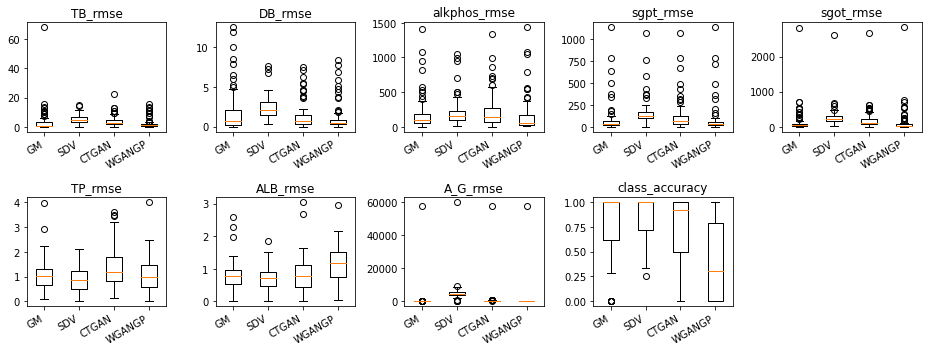

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(13,2.5*2))
axs_idxs = [[0,0], [0,1], [0,2], [0,3], [0,4], [1,0], [1,1], [1,2], [1,3]]
idx = dict(zip(results_columns,axs_idxs))

for c in results_columns :
    ax = axs[idx[c][0], idx[c][1]]
    ax.boxplot(boxplots_data[c])
    ax.set_title(c)
    ax.set_xticklabels(SYNTHESIZERS)
    
for ax in axs.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha="right")    

fig.delaxes(axs[1,4])
plt.tight_layout()
fig.savefig('INFERENCE TESTS RESULTS/ATTRIBUTES INFERENCE TESTS RESULTS.svg', bbox_inches='tight')